In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from pandas.io.formats.info import DataFrameTableBuilder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
# Create Classifiers
lr = LogisticRegression()
svc = LinearSVC(C=1.0)
rc = RandomForestClassifier(n_estimators=100)

In [ ]:
# Load data
d_f = pd.read_csv("https://raw.githubusercontent.com/GibranHamrouniCases/GibranHamrouniCases.github.io/main/F1_Tyres_Red_Num.csv")
print(d_f.shape)
d_f.describe()

(46, 59)


,Ranking,Lap_1,Lap_2,Lap_3,Lap_4,Lap_5,Lap_6,Lap_7,Lap_8,Lap_9,...,Lap_49,Lap_50,Lap_51,Lap_52,Lap_53,Lap_54,Lap_55,Lap_56,Lap_57,Lap_58
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,...,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,4.456522,3.630435,3.630435,3.630435,3.630435,3.630435,3.652174,3.673913,3.782609,3.869565,...,4.630435,4.630435,4.630435,4.630435,4.630435,4.543478,4.543478,4.543478,4.543478,4.543478
std,3.925453,1.355789,1.355789,1.355789,1.355789,1.355789,1.353471,1.350792,1.280851,1.222178,...,1.305692,1.305692,1.305692,1.305692,1.305692,1.277263,1.277263,1.277263,1.277263,1.277263
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,...,3.250000,3.250000,3.250000,3.250000,3.250000,3.250000,3.250000,3.250000,3.250000,3.250000
50%,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.500000,4.500000,4.500000,4.500000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,18.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [ ]:
d_f.head(49)
d_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 59 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Ranking  46 non-null     int64
 1   Lap_1    46 non-null     int64
 2   Lap_2    46 non-null     int64
 3   Lap_3    46 non-null     int64
 4   Lap_4    46 non-null     int64
 5   Lap_5    46 non-null     int64
 6   Lap_6    46 non-null     int64
 7   Lap_7    46 non-null     int64
 8   Lap_8    46 non-null     int64
 9   Lap_9    46 non-null     int64
 10  Lap_10   46 non-null     int64
 11  Lap_11   46 non-null     int64
 12  Lap_12   46 non-null     int64
 13  Lap_13   46 non-null     int64
 14  Lap_14   46 non-null     int64
 15  Lap_15   46 non-null     int64
 16  Lap_16   46 non-null     int64
 17  Lap_17   46 non-null     int64
 18  Lap_18   46 non-null     int64
 19  Lap_19   46 non-null     int64
 20  Lap_20   46 non-null     int64
 21  Lap_21   46 non-null     int64
 22  Lap_22   46 non-null     int

In [ ]:
d_f.shape

(46, 59)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(d_f, test_size=0.2)

In [ ]:
train.shape

(36, 59)

In [ ]:
test.shape

(10, 59)

In [ ]:
train.iloc[:,1:59].head(5)

,Lap_1,Lap_2,Lap_3,Lap_4,Lap_5,Lap_6,Lap_7,Lap_8,Lap_9,Lap_10,...,Lap_49,Lap_50,Lap_51,Lap_52,Lap_53,Lap_54,Lap_55,Lap_56,Lap_57,Lap_58
8,2,2,2,2,2,2,2,2,4,4,...,3,3,3,3,3,3,3,3,3,3
39,4,4,4,4,4,4,4,4,4,4,...,6,6,6,6,6,4,4,4,4,4
5,3,3,3,3,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
19,1,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
31,4,4,4,4,4,4,4,4,4,4,...,6,6,6,6,6,6,6,6,6,6


In [ ]:
train_feat = train.iloc[:,1:59]
train_targ = train["Ranking"]

In [ ]:
train_feat.shape

(36, 58)

In [ ]:
train_targ.shape

(36,)

In [ ]:
train[["Ranking"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 8 to 42
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Ranking  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


In [ ]:
lr.fit(train_feat, train_targ) 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(train_feat, train_targ)

0.6944444444444444

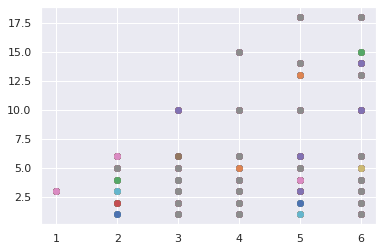

In [ ]:
plt.plot(train_feat, train_targ, 'o');

CLASSIFICATION

In [ ]:
from sklearn import neighbors, datasets

iris = pd.read_csv("https://raw.githubusercontent.com/GibranHamrouniCases/GibranHamrouniCases.github.io/main/F1_Tyres_Red_Num.csv")
iris_data = iris.iloc[:, 1:59].to_numpy()
X,y  = iris_data, iris.Ranking

X.shape

(46, 58)

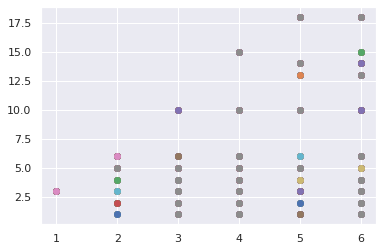

In [ ]:
plt.plot(iris_data, iris.Ranking, 'o');

In [ ]:
print((iris).keys())

Index(['Ranking', 'Lap_1', 'Lap_2', 'Lap_3', 'Lap_4', 'Lap_5', 'Lap_6',
       'Lap_7', 'Lap_8', 'Lap_9', 'Lap_10', 'Lap_11', 'Lap_12', 'Lap_13',
       'Lap_14', 'Lap_15', 'Lap_16', 'Lap_17', 'Lap_18', 'Lap_19', 'Lap_20',
       'Lap_21', 'Lap_22', 'Lap_23', 'Lap_24', 'Lap_25', 'Lap_26', 'Lap_27',
       'Lap_28', 'Lap_29', 'Lap_30', 'Lap_31', 'Lap_32', 'Lap_33', 'Lap_34',
       'Lap_35', 'Lap_36', 'Lap_37', 'Lap_38', 'Lap_39', 'Lap_40', 'Lap_41',
       'Lap_42', 'Lap_43', 'Lap_44', 'Lap_45', 'Lap_46', 'Lap_47', 'Lap_48',
       'Lap_49', 'Lap_50', 'Lap_51', 'Lap_52', 'Lap_53', 'Lap_54', 'Lap_55',
       'Lap_56', 'Lap_57', 'Lap_58'],
      dtype='object')


In [ ]:
# create the model
knn = neighbors.KNeighborsClassifier()
# knn = neighbors.KNeighborsClassifier(n_neighbors=15) #you can specify the number of neighbors if you'd like

# fit the model
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
                       5, 5, 3, 3, 3, 3, 3, 3, 3, 3,
                       3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                       3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
                       4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
                       4, 4, 4, 4, 4, 4, 4, 4,
                       ]])
print(result,iris.Ranking[result])

[4] 4    6
Name: Ranking, dtype: int64


In [ ]:
# Multiple flowers at once? Sure. As long as is in the X format
X2=np.array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
              5, 5, 3, 3, 3, 3, 3, 3, 3, 3,
              3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
              3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
              4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
              4, 4, 4, 4, 4, 4, 4, 4,
              ], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
              3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
              3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
              4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
              4, 4, 4, 4, 4, 4, 4, 4,
              ],[1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
              1, 1, 1, 1, 1, 1, 3, 3, 3, 3,
              3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
              3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
              3, 3, 3, 3, 3, 3, 3, 3,
              ]])

result = knn.predict(X2)
print(result,iris.Ranking[result])

[4 3 3] 4    6
3    4
3    4
Name: Ranking, dtype: int64


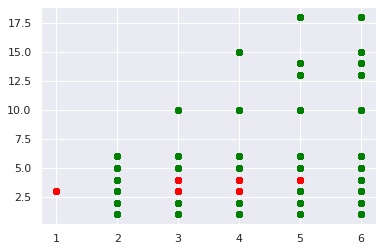

In [ ]:
plt.plot(iris_data, iris.Ranking, 'o', color='green');
plt.plot(X2, result, 'o',color='red');

In [ ]:
regressor = LinearRegression()
regressor.fit(X, y)


y_pred = regressor.predict(X)
# Calculates R^2
score = regressor.score(X,y)

In [ ]:
import seaborn as sns
sns.set()

In [ ]:
iris_lap = iris.iloc[:, 10:11]
x,y  = iris_lap, iris.Ranking

Text(0, 0.5, 'Ranking')

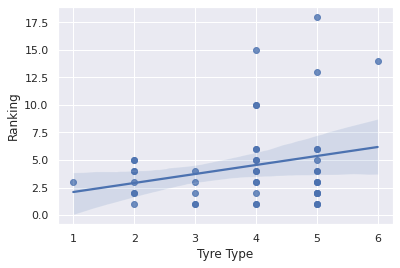

In [ ]:
sns.regplot(x= iris_lap,y= iris.Ranking,)
plt.xlabel('Tyre Type')
plt.ylabel('Ranking')

Backup Slope - from Lecturer code

In [ ]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(46, 58)
(46, 3)


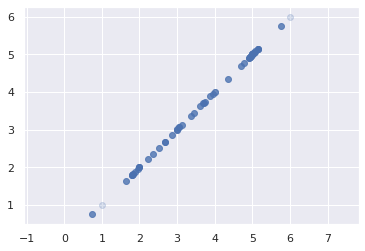

In [ ]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');